In [1]:
import pandas as pd
import numpy as np

# Cambia 'data.csv' por el nombre real de tu archivo
ruta = "/content/data.csv"

# Este dataset viene separado por punto y coma (;)
df = pd.read_csv(ruta, sep=';')

df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
df.shape


(4424, 37)

In [19]:
# Información general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [20]:
# Nulos por columna
df.isna().sum().sort_values(ascending=False)


,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [3]:
df['Target'].value_counts()


,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1) Separar X e y
X = df.drop('Target', axis=1)
y = df['Target']

# 2) Detectar columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 3) Transformaciones
numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4) Modelo
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

# 5) Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6) Entrenar
clf.fit(X_train, y_train)

# 7) Evaluar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Dropout       0.82      0.75      0.78       284
    Enrolled       0.56      0.36      0.44       159
    Graduate       0.78      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.75      0.77      0.75       885



In [22]:
import joblib

# Guardar el modelo entrenado
joblib.dump(clf, 'modelo_dropout.pkl')


['modelo_dropout.pkl']

In [7]:
# Columnas del dataset (para que veas nombres exactos)
df.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [8]:
# Información general de tipos de datos y nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [9]:
# Nulos por columna (si todo sale en 0 o muy poco, perfecto)
df.isna().sum().sort_values(ascending=False)


,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [21]:
df['Target'].value_counts()


,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


gráficas para el análisis exploratorio

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


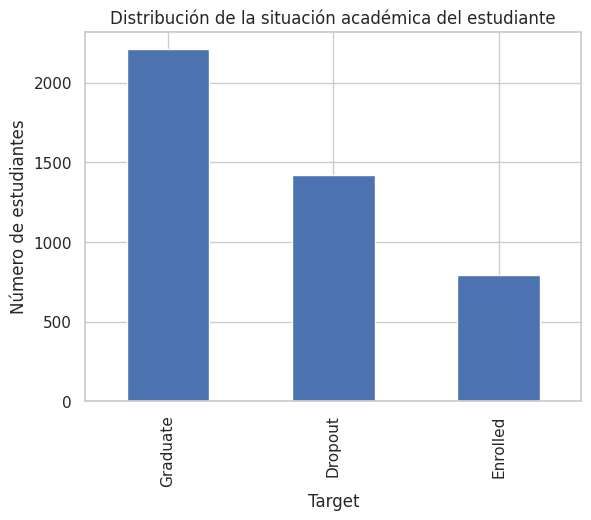

In [11]:
target_counts = df['Target'].value_counts()

target_counts.plot(kind='bar')
plt.title('Distribución de la situación académica del estudiante')
plt.xlabel('Target')
plt.ylabel('Número de estudiantes')
plt.show()


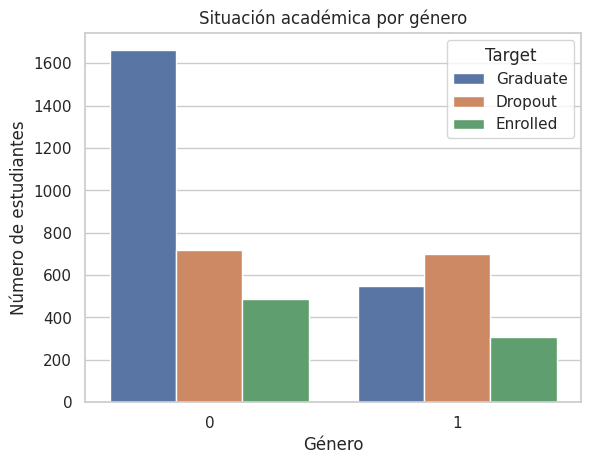

In [12]:
sns.countplot(data=df, x='Gender', hue='Target')
plt.title('Situación académica por género')
plt.xlabel('Género')
plt.ylabel('Número de estudiantes')
plt.legend(title='Target')
plt.show()


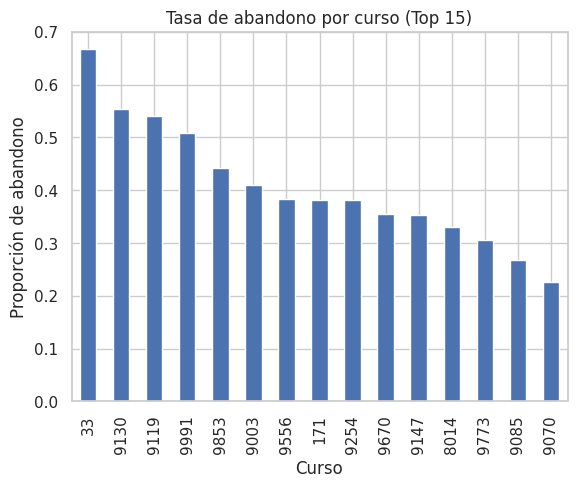

In [13]:
dropout_rate = (
    df.groupby('Course')['Target']
      .apply(lambda x: (x == 'Dropout').mean())
      .sort_values(ascending=False)
)

dropout_rate.head(15).plot(kind='bar')
plt.title('Tasa de abandono por curso (Top 15)')
plt.ylabel('Proporción de abandono')
plt.xlabel('Curso')
plt.show()


Importancia de variables del modelo

In [15]:
# IMPORTANCIA DE VARIABLES DEL MODELO

# 1) Sacar el preprocesador ya fiteado y el modelo del pipeline
preprocess = clf.named_steps['preprocess']   # ColumnTransformer ya entrenado
rf_model   = clf.named_steps['model']        # RandomForest ya entrenado

# 2) Nombres de TODAS las columnas después del preprocesamiento
feature_names = preprocess.get_feature_names_out()

# 3) Importancias del Random Forest
importances = rf_model.feature_importances_

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

feat_imp.head(20)


,feature,importance
30,num__Curricular units 2nd sem (approved),0.126016
31,num__Curricular units 2nd sem (grade),0.093321
24,num__Curricular units 1st sem (approved),0.067409
25,num__Curricular units 1st sem (grade),0.065422
12,num__Admission grade,0.047419
29,num__Curricular units 2nd sem (evaluations),0.045668
19,num__Age at enrollment,0.042926
6,num__Previous qualification (grade),0.042507
23,num__Curricular units 1st sem (evaluations),0.041072
16,num__Tuition fees up to date,0.037364


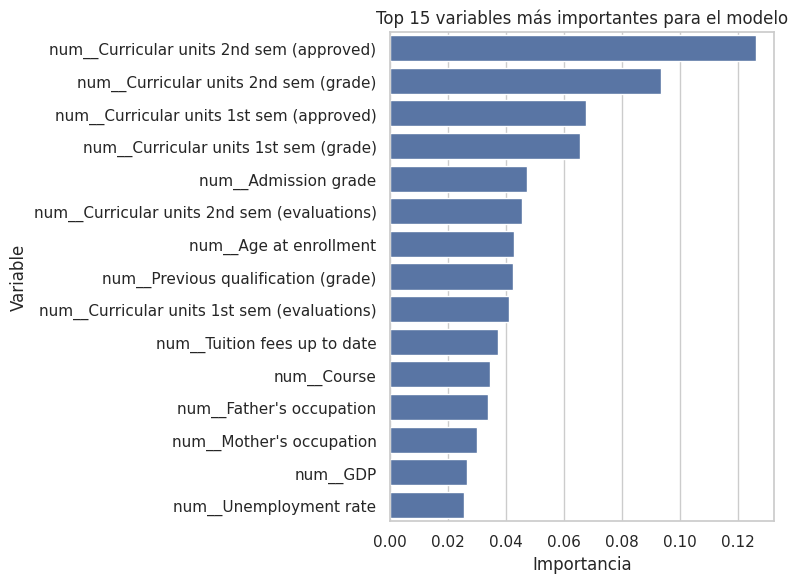

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp.head(15), x='importance', y='feature')
plt.title('Top 15 variables más importantes para el modelo')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [23]:
from google.colab import files
files.download('modelo_dropout.pkl')
files.download('data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

st.set_page_config(
    page_title="Abandono escolar – Dashboard",
    layout="wide"
)

sns.set(style="whitegrid")

# =========================
# Funciones auxiliares
# =========================
@st.cache_data
def load_data():
    # Asegúrate que el nombre coincida con tu archivo
    df = pd.read_csv("data.csv", sep=";")
    return df

@st.cache_resource
def load_model():
    clf = joblib.load("modelo_dropout.pkl")
    return clf

df = load_data()
clf = load_model()

X = df.drop("Target", axis=1)
y = df["Target"]

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Para rellenar valores por defecto en el simulador
num_defaults = X[numeric_features].median()
cat_defaults = X[categorical_features].mode().iloc[0]

# =========================
# Navegación
# =========================
st.sidebar.title("Navegación")
pagina = st.sidebar.radio(
    "Ir a:",
    ["Inicio", "Exploración de datos", "Simulador de predicción"]
)

# =========================
# Página: INICIO
# =========================
if pagina == "Inicio":
    st.title("Predicción de abandono escolar en educación superior")

    st.write(
        """
        Este dashboard utiliza un modelo de **clasificación** para estimar si un estudiante
        tiene mayor probabilidad de **abandonar**, **seguir inscrito** o **graduarse**.
        Los datos provienen de una institución de educación superior e incluyen información
        académica, socioeconómica y de desempeño en los primeros semestres.
        """
    )

    col1, col2, col3 = st.columns(3)

    total_estudiantes = len(df)
    tasa_dropout = (df["Target"] == "Dropout").mean() * 100
    tasa_graduate = (df["Target"] == "Graduate").mean() * 100

    col1.metric("Total de estudiantes", total_estudiantes)
    col2.metric("% que abandonan", f"{tasa_dropout:.1f}%")
    col3.metric("% que se gradúan", f"{tasa_graduate:.1f}%")

    st.subheader("Distribución general de la situación académica")

    fig, ax = plt.subplots()
    df["Target"].value_counts().plot(kind="bar", ax=ax)
    ax.set_title("Distribución de la situación académica (Target)")
    ax.set_xlabel("Target")
    ax.set_ylabel("Número de estudiantes")
    st.pyplot(fig)

    st.markdown(
        """
        **Resumen del modelo (Random Forest):**
        - Problema: clasificación multiclase (`Dropout`, `Enrolled`, `Graduate`).
        - Métrica principal: *accuracy* ≈ **0.77** en el conjunto de prueba.
        - Las variables con mayor importancia son unidades curriculares aprobadas y calificación
          en los dos primeros semestres, así como la edad de ingreso y el cumplimiento de pagos.
        """
    )

# =========================
# Página: EXPLORACIÓN
# =========================
elif pagina == "Exploración de datos":
    st.title("Exploración de datos")

    st.write("Puedes filtrar por **curso** para ver cómo cambia la distribución.")

    cursos = ["Todos"] + sorted(df["Course"].unique().tolist())
    curso_sel = st.selectbox("Curso", cursos)

    if curso_sel == "Todos":
        df_filtro = df.copy()
    else:
        df_filtro = df[df["Course"] == curso_sel]

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("Distribución de Target")
        fig1, ax1 = plt.subplots()
        df_filtro["Target"].value_counts().plot(kind="bar", ax=ax1)
        ax1.set_title("Situación académica")
        ax1.set_xlabel("Target")
        ax1.set_ylabel("Número de estudiantes")
        st.pyplot(fig1)

    with col2:
        st.subheader("Situación académica por género")
        fig2, ax2 = plt.subplots()
        sns.countplot(data=df_filtro, x="Gender", hue="Target", ax=ax2)
        ax2.set_title("Target por género")
        ax2.set_xlabel("Género")
        ax2.set_ylabel("Número de estudiantes")
        st.pyplot(fig2)

    st.subheader("Tasa de abandono por curso (Top 15)")

    dropout_rate = (
        df.groupby("Course")["Target"]
        .apply(lambda x: (x == "Dropout").mean())
        .sort_values(ascending=False)
    )

    fig3, ax3 = plt.subplots(figsize=(10, 4))
    dropout_rate.head(15).plot(kind="bar", ax=ax3)
    ax3.set_title("Proporción de estudiantes que abandonan por curso")
    ax3.set_ylabel("Proporción de abandono")
    ax3.set_xlabel("Curso")
    st.pyplot(fig3)

# =========================
# Página: SIMULADOR
# =========================
elif pagina == "Simulador de predicción":
    st.title("Simulador de riesgo de abandono")

    st.write(
        """
        Completa la información del estudiante para estimar la probabilidad de que
        **abandone**, continúe **inscrito** o se **gradúe**.
        Algunas variables ya vienen prellenadas con valores típicos del conjunto de datos.
        """
    )

    # ---------- Entradas del usuario ----------
    st.subheader("Datos académicos principales")

    input_data = {}

    vars_academicas = [
        "Age at enrollment",
        "Admission grade",
        "Curricular units 1st sem (approved)",
        "Curricular units 1st sem (grade)",
        "Curricular units 2nd sem (approved)",
        "Curricular units 2nd sem (grade)",
        "Tuition fees up to date",
    ]

    for col in vars_academicas:
        if col not in X.columns:
            continue
        if col in numeric_features:
            min_val = float(X[col].min())
            max_val = float(X[col].max())
            default = float(num_defaults[col])
            input_data[col] = st.slider(
                col,
                min_value=min_val,
                max_value=max_val,
                value=default
            )
        else:
            opciones = sorted(df[col].unique().tolist())
            default = cat_defaults[col]
            idx = opciones.index(default) if default in opciones else 0
            input_data[col] = st.selectbox(col, opciones, index=idx)

    st.subheader("Datos socioeconómicos y de contexto")

    vars_contexto = [
        "Gender",
        "Course",
        "Marital status",
        "Application mode",
        "Daytime/evening attendance",
        "Scholarship holder",
        "Debtor",
        "Mother's qualification",
        "Father's qualification",
    ]

    for col in vars_contexto:
        if col not in X.columns:
            continue
        opciones = sorted(df[col].unique().tolist())
        default = cat_defaults[col] if col in categorical_features else opciones[0]
        idx = opciones.index(default) if default in opciones else 0
        input_data[col] = st.selectbox(col, opciones, index=idx)

    # Rellenar el resto de columnas con valores por defecto
    for col in X.columns:
        if col not in input_data:
            if col in numeric_features:
                input_data[col] = num_defaults[col]
            else:
                input_data[col] = cat_defaults[col]

    if st.button("Calcular predicción"):
        entrada = pd.DataFrame([input_data])
        pred = clf.predict(entrada)[0]
        proba = clf.predict_proba(entrada)[0]
        proba_dict = {clase: round(p * 100, 1) for clase, p in zip(clf.classes_, proba)}

        st.subheader("Resultado del modelo")
        st.write(f"**Predicción:** {pred}")
        st.write("**Probabilidades:**")
        st.write(proba_dict)

        st.info(
            "Este resultado es una estimación basada en datos históricos. "
            "No sustituye el análisis individual del caso, pero puede ayudar a priorizar "
            "estudiantes en riesgo para ofrecerles apoyo oportuno."
        )


Overwriting app.py
